# Init
Get the data from the EventBrite API and process it into a list of events.
Cache it to an `events.json` file stored in the file system.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from bezoekers_analyse import Events

plt.close("all")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

events = Events(
    # documentation: https://www.eventbrite.nl/platform/api
    # new API key from: https://www.eventbrite.nl/platform/api-keys/
    #   note: each visit of this page creates a new API key at https://www.eventbrite.nl/account-settings/apps
    # API key stored in Bitwarden vault Bas
    '<api_key>', 
    [
        "zwanenveld",
        "biezantijn",
        "mariënburg",
        "online",
        "valkhof",
    ],
    [
        37396107765,
        43018135401,
        49624002728,
    ]
)


# List all dojo's over time

In [2]:
columns, dojos = events.get_dojos()
pd.DataFrame(dojos, columns=columns)

,maand,datum,locatie,onderwerp,aantal tickets,gekocht,ingecheckt
0,11,2016-11-05,Bibliotheek De Mariënburg,CoderDojo Nijmegen #22,25,28,20
1,12,2016-12-03,Bibliotheek Zwanenveld,CoderDojo Nijmegen #23,18,19,12
2,01,2017-01-07,De Biezantijn,CoderDojo Nijmegen #24,20,14,12
3,02,2017-02-04,De Biezantijn,CoderDojo Nijmegen #25,20,16,10
4,03,2017-03-04,De Biezantijn,CoderDojo Nijmegen #26,20,13,13
5,04,2017-04-01,De Mariënburg,CoderDojo Nijmegen #27,20,12,10
6,05,2017-05-06,De Mariënburg,CoderDojo Nijmegen #28,20,17,11
7,06,2017-06-03,De Mariënburg,CoderDojo Nijmegen #29,16,16,11
8,07,2017-07-01,Bibliotheek De Biezantijn,CoderDojo #30,18,10,8
9,08,2017-08-05,De Smeltkroes,CoderDojo #31,20,9,7


# Available, booked and checked-in

<Axes: title={'center': 'dojo stats'}, xlabel='datum'>

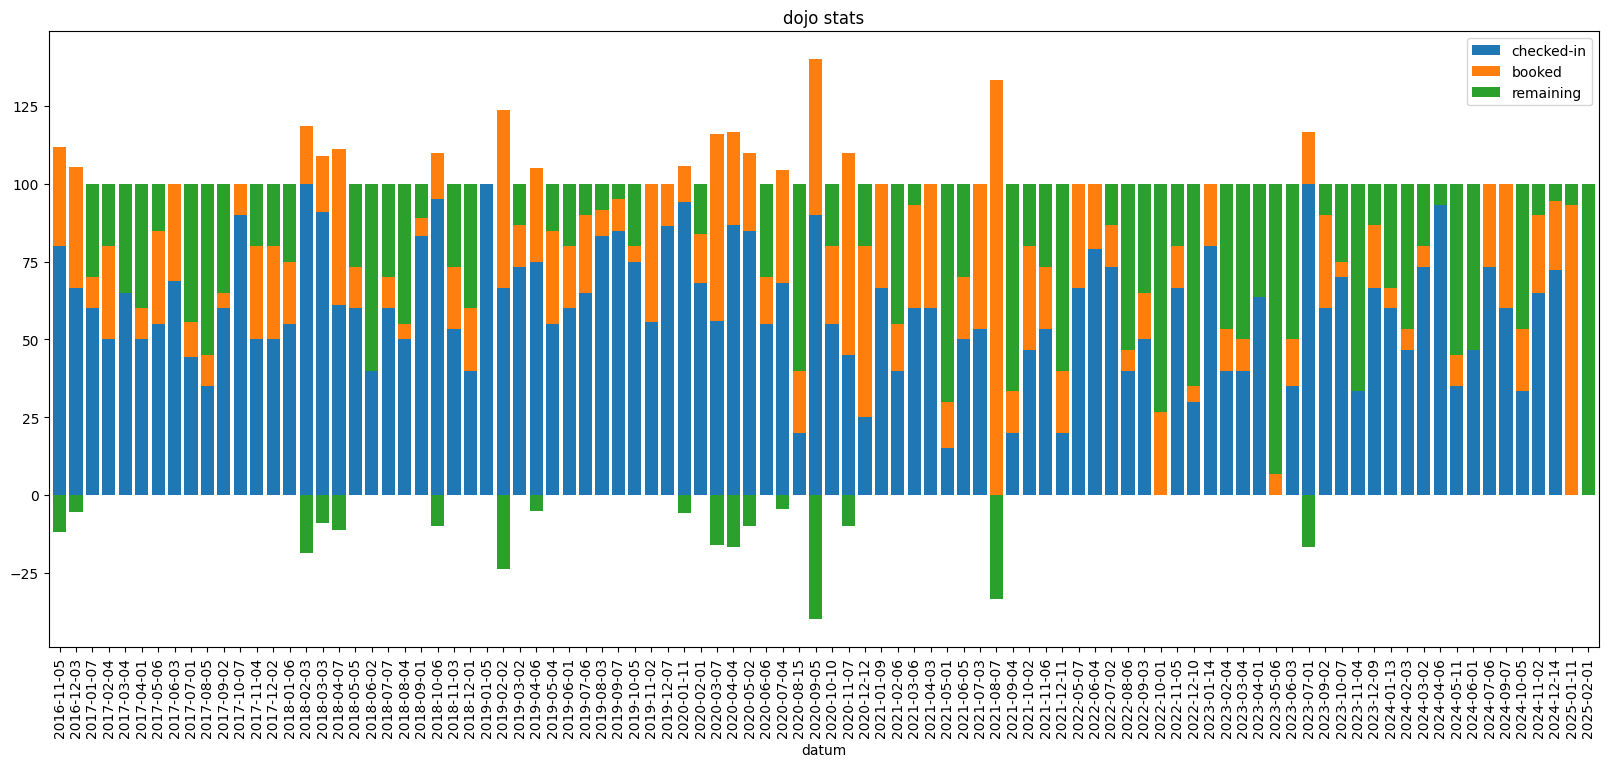

In [3]:
axes, stats = events.get_dojo_stats()
df = pd.DataFrame(stats)
df.plot(x=axes['x'], y=axes['y'], kind='bar', stacked=True, figsize=(20,8), width=0.8, title='dojo stats')

# Show checkins over time

<Axes: title={'center': 'checkins over tijd'}, xlabel='datum'>

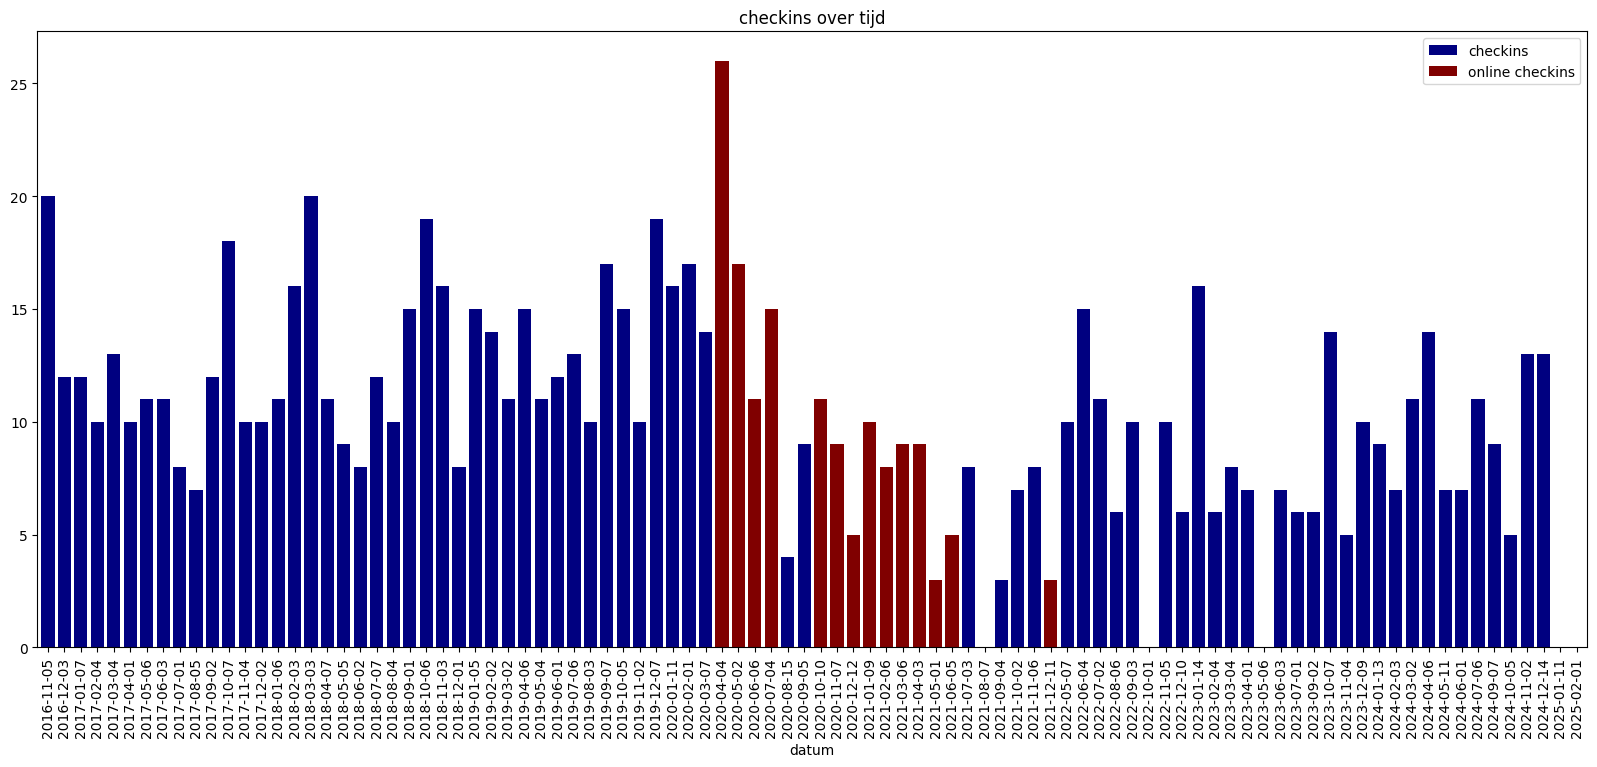

In [4]:
axes, checkins = events.get_checkins_over_time()
df = pd.DataFrame(checkins)
df.plot(x=axes['x'], y=axes['y'], kind='bar', stacked=True, width=0.8, figsize=(20,8), colormap='jet', title='checkins over tijd')


# Show checkins over time per location

<Axes: title={'center': 'checkins over tijd per locatie'}, xlabel='datum'>

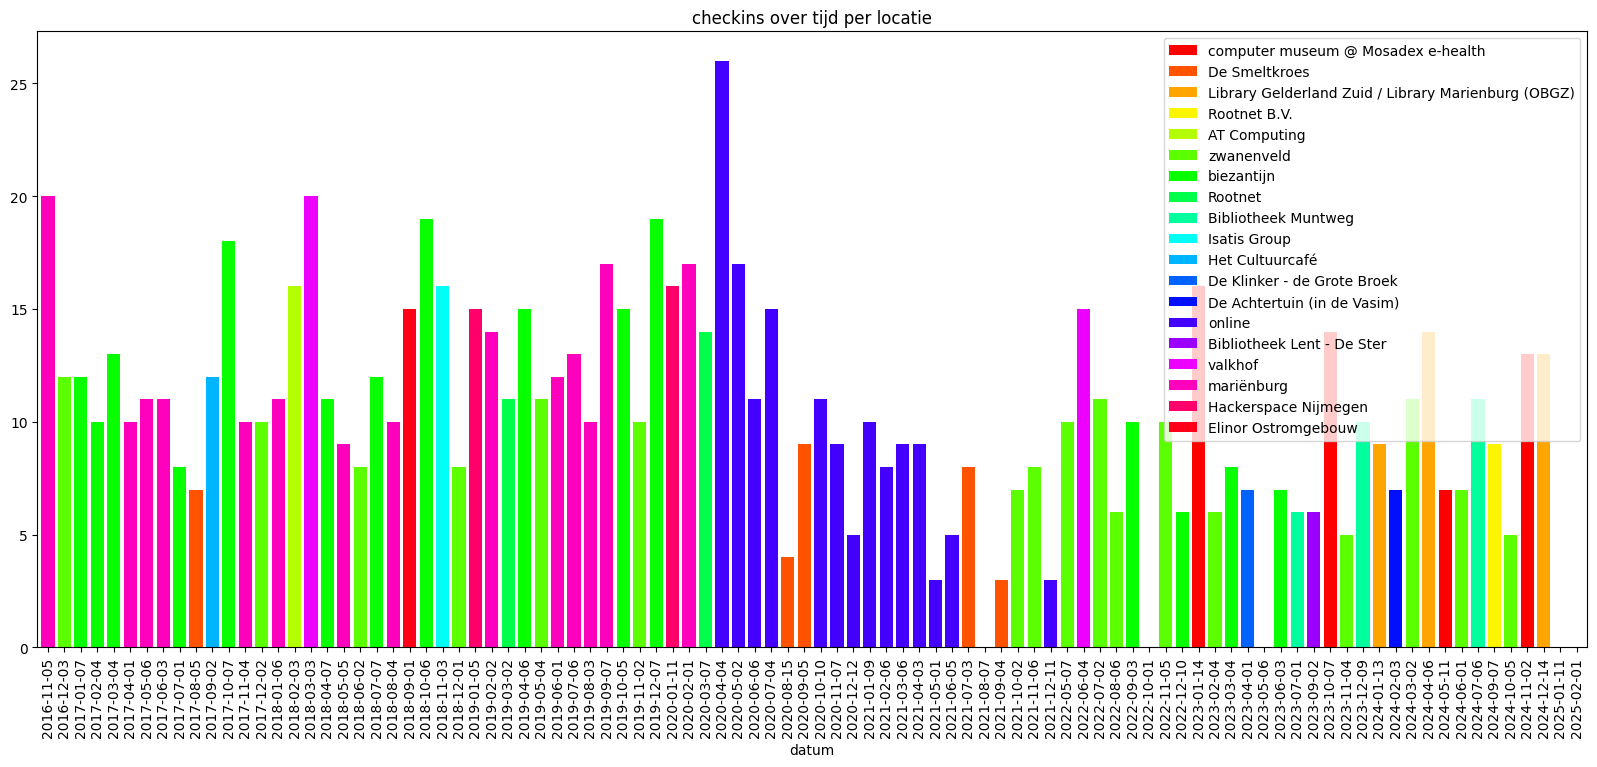

In [5]:

locations, checkins = events.get_checkins_per_location_over_time()
df = pd.DataFrame(checkins)
df.plot(x='datum', y=locations, kind='bar', figsize=(20,8), stacked=True, width=0.8, colormap='hsv', title='checkins over tijd per locatie')
    


# Show checkins over time month of the year

<Axes: title={'center': 'checkins per maand van het jaar'}, xlabel='maand'>

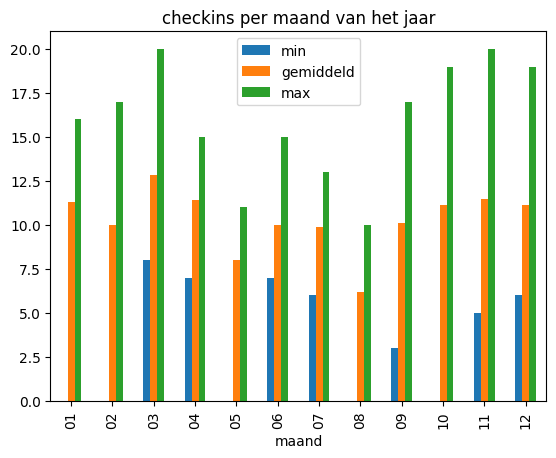

In [6]:
columns, axes, monthly = events.get_checkins_per_month_of_the_year()
df = pd.DataFrame(monthly, columns=columns)
df.plot(x=axes['x'], y=axes['y'], kind='bar', title='checkins per maand van het jaar')
